In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose


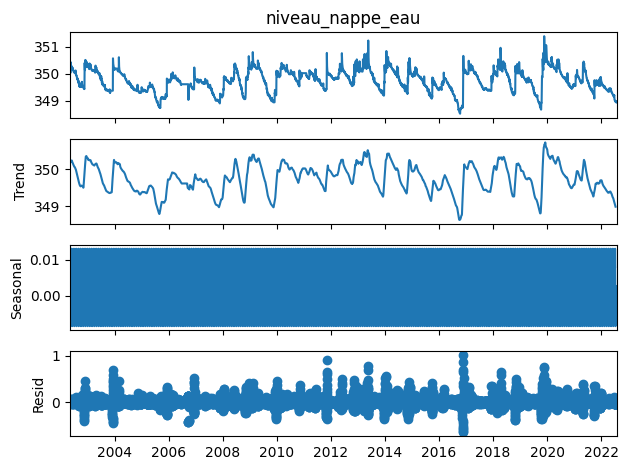

In [ ]:


df = pd.read_csv("merged_X142000101_v2.csv")

df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df.set_index("Date", inplace=True)

y = df["niveau_nappe_eau"]
X = df.drop(columns=["niveau_nappe_eau"])
y = y.astype(float)
X = X.astype(float)
X = X.asfreq('D', method='pad')
y = y.asfreq('D', method='pad')

X_train = X['2016':'2020']
y_train = y['2016':'2020']
X_test = X['2021':]
y_test = y['2021':]


decomposition = seasonal_decompose(y, model='additive', period=30)
decomposition.plot()
plt.show()





In [4]:
y_train.head()


Date
2016-01-01    349.40
2016-01-02    349.45
2016-01-03    349.47
2016-01-04    349.46
2016-01-05    349.45
Freq: D, Name: niveau_nappe_eau, dtype: float64

In [48]:
model = SARIMAX(
    y_train,
    exog=X_train,
    seasonal_order=(1, 1, 1, 30),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()

/home/aguerouani/suez/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


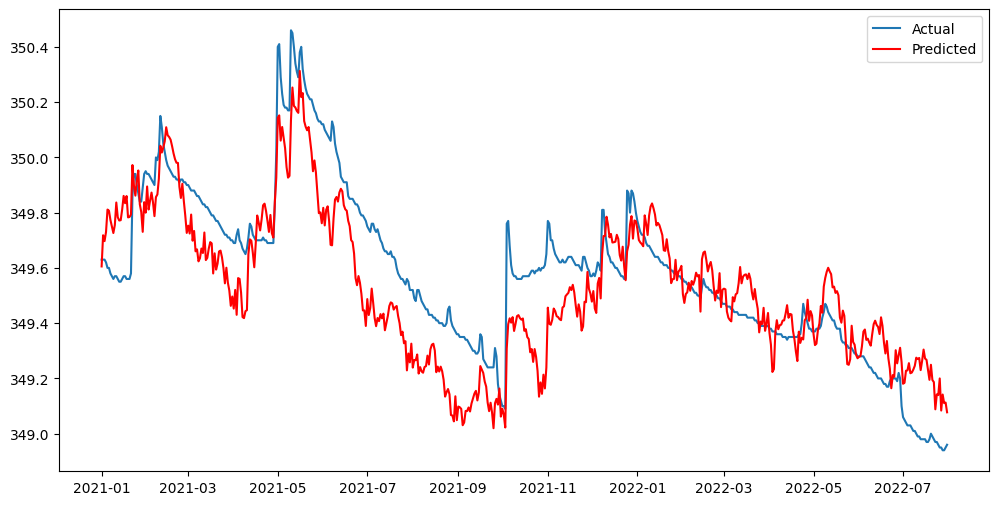

In [49]:
# test the model
y_pred_test = result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)
y_pred_test.index = y_test.index
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.legend()
plt.show()


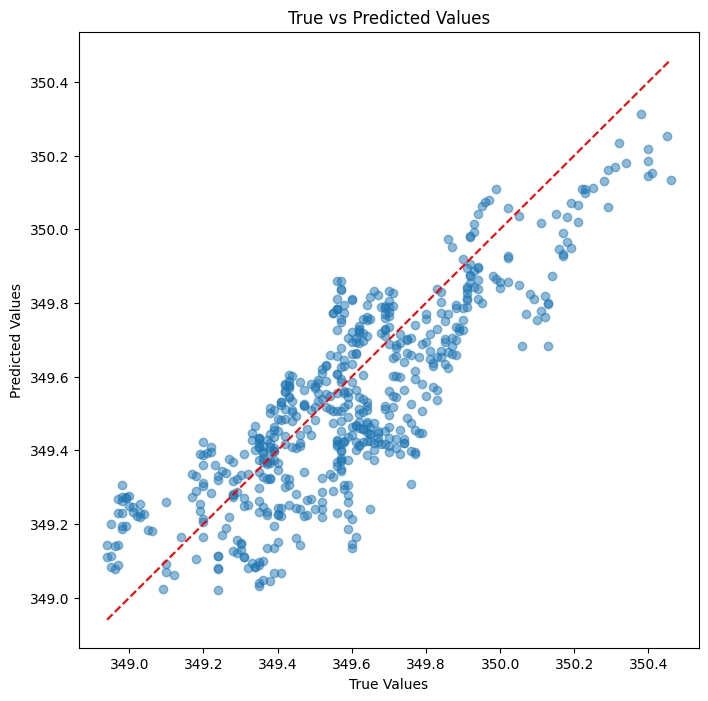

Mean Absolute Error: 0.145618815823437
Mean Squared Error: 0.030264178041820144
Root Mean Squared Error: 0.17396602553895443
R-squared: 0.6534007039170011


In [50]:
# plot true in fuction of predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max
()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

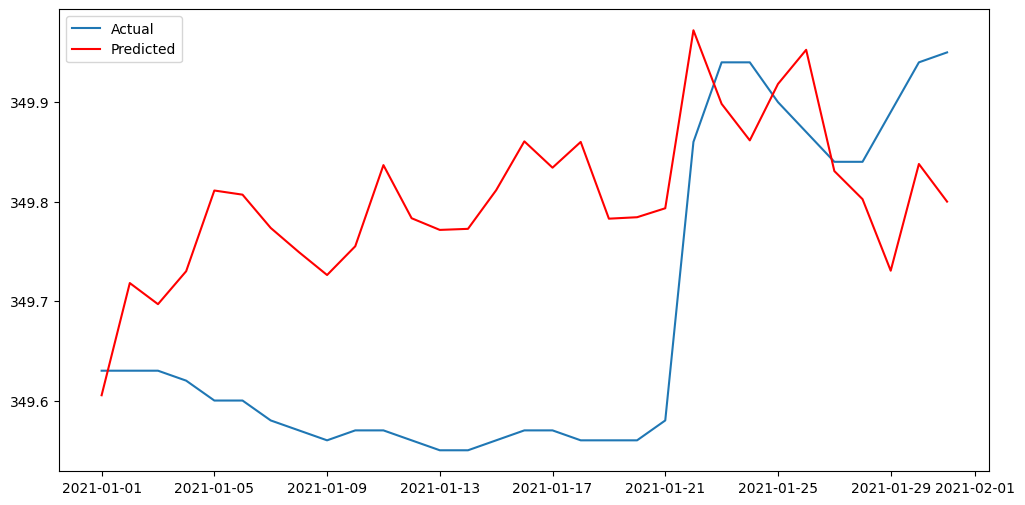

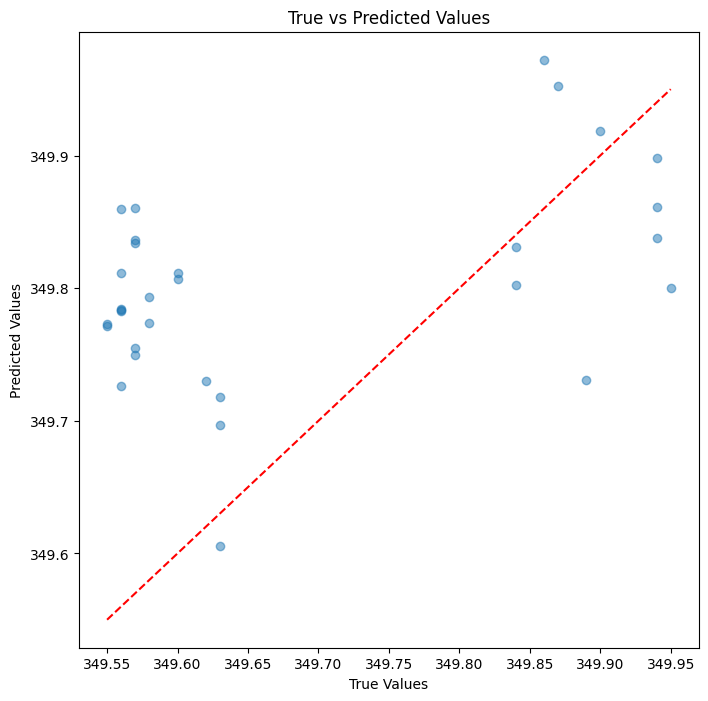

Mean Absolute Error: 0.15884837362394563
Mean Squared Error: 0.032381346510680115
Root Mean Squared Error: 0.17994817729190846
R-squared: -0.40918524072188833


In [51]:
# test the model
y_pred_test = result.predict(start=len(y_train), end=len(y_train)+30, exog=X_test[:31])
y_pred_test.index = y_test[:31].index
plt.figure(figsize=(12,6))
plt.plot(y_test[:31], label='Actual')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.legend()
plt.show()


# plot true in fuction of predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test[:31], y_pred_test, alpha=0.5)
plt.plot([y_test[:31].min(), y_test[:31].max()], [y_test[:31].min(), y_test[:31].max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
mae = mean_absolute_error(y_test[:31], y_pred_test)
mse = mean_squared_error(y_test[:31], y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test[:31], y_pred_test)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


ValueError: x and y must be the same size

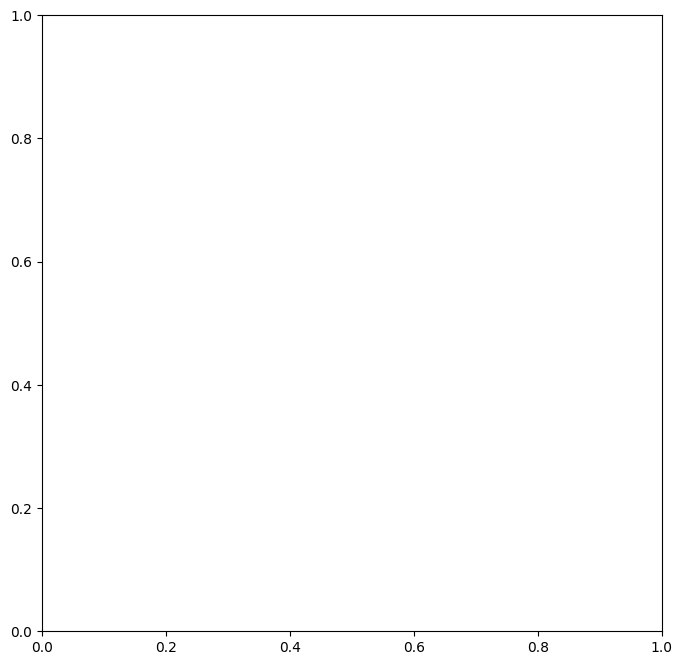